In [13]:
import pandas as pd
import numpy as np

import os

import itertools

import seaborn as sns

import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go

In [3]:
cd C:\Users\hanne\dengue-predict

C:\Users\hanne\dengue-predict


In [4]:
train_labels = pd.read_csv('data/dengue_labels_train.csv')

In [5]:
train = pd.read_csv('data/dengue_features_train.csv')

In [6]:
train = train.merge(train_labels, on=['city','year','weekofyear'], how='left')

<AxesSubplot:>

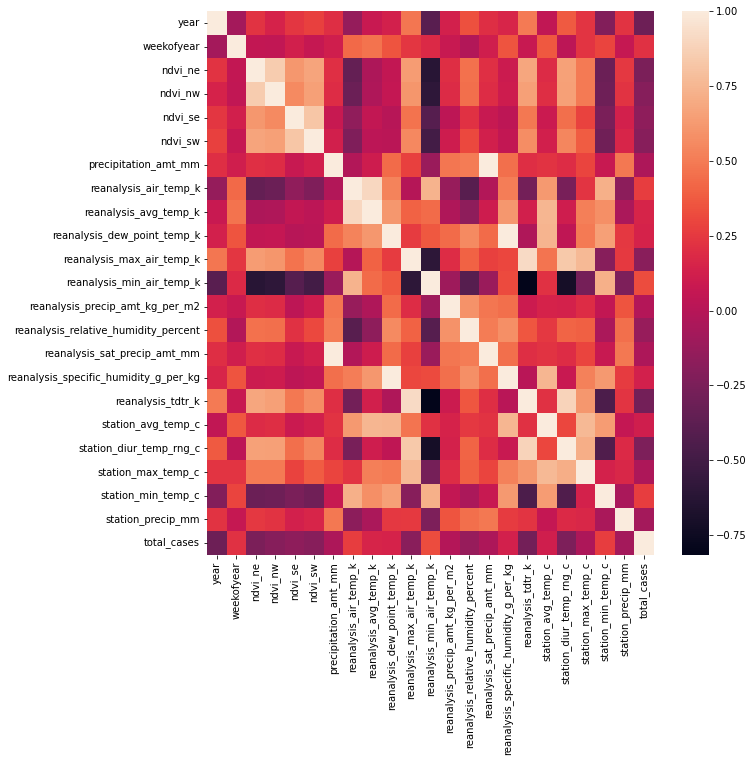

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(train.corr(), ax=ax)

In [8]:
for (c1, c2) in itertools.combinations(train.corr().columns, 2):
        if np.abs(train.corr().loc[c1,c2]) > 0.95 and c1 != c2:
            print(f"The absolute correlation coefficient between {c1} and {c2} is higher 0.9 [correlation coefficient = {train.corr().loc[c1,c2]}].")

The absolute correlation coefficient between precipitation_amt_mm and reanalysis_sat_precip_amt_mm is higher 0.9 [correlation coefficient = 1.0].
The absolute correlation coefficient between reanalysis_dew_point_temp_k and reanalysis_specific_humidity_g_per_kg is higher 0.9 [correlation coefficient = 0.9970512932011444].


# Geographic distribution of pandemic outbreaks

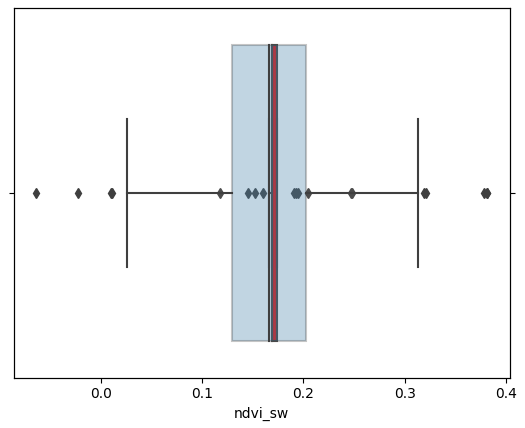

# Differential distribution of pandemic and non-pandemic perdiods over weeks of year

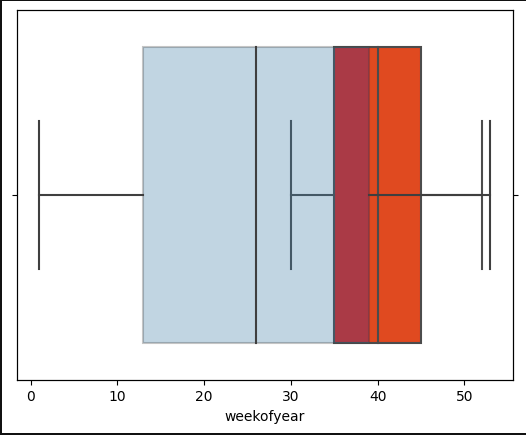

In [9]:
train_sj = train[train.city=='sj']
train_iq = train[train.city=='iq']

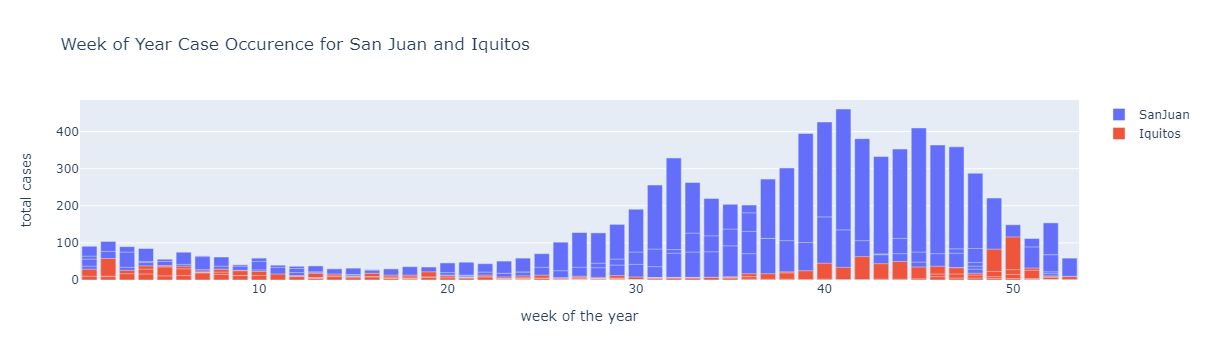

In [34]:
# Week of Year Case Occurence for San Juan and Iquitos
trace1 = go.Bar(
    x=train_sj.weekofyear,
    y=train_sj.total_cases,
    name="SanJuan"
)
trace2 = go.Bar(
    x=train_iq.weekofyear,
    y=train_iq.total_cases,
    name="Iquitos"
)
data = [trace1,trace2]
layout = go.Layout(barmode = 'overlay', xaxis_title='week of the year', yaxis_title='total cases'
                   ,title = 'Week of Year Case Occurence for San Juan and Iquitos')
fig = go.Figure(data = data, layout = layout)
fig.show()

AxesSubplot(0.125,0.125;0.775x0.755)


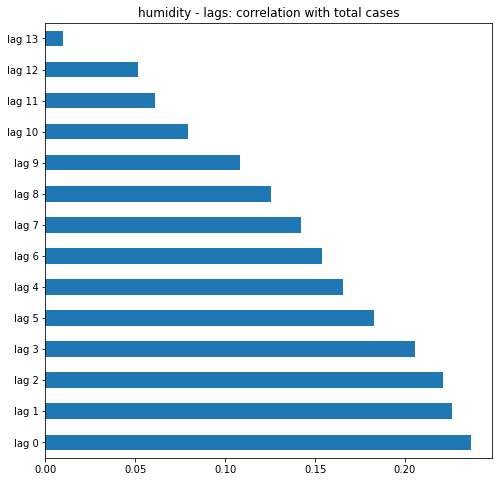

In [25]:
for c in ['reanalysis_specific_humidity_g_per_kg']:
    new_df_iq = pd.DataFrame(train_iq['total_cases'])
    for i in range(14):
        new_df_iq['lag '+str(i)] = train_iq[c].shift(i)
    print(new_df_iq.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh(title='humidity - lags: correlation with total cases', figsize=(8,8)))

AxesSubplot(0.125,0.125;0.775x0.755)


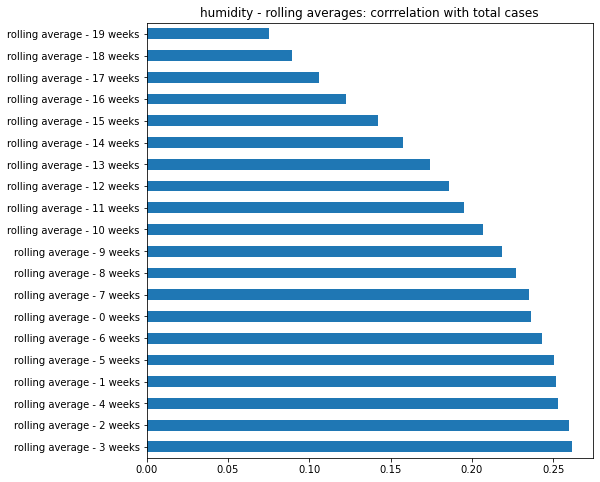

In [23]:
import matplotlib.pyplot as plt

figures = []

for j, c in enumerate(['reanalysis_specific_humidity_g_per_kg']):
    new_df_iq = pd.DataFrame(train_iq['total_cases'])
    for i in range(20):
        new_df_iq['rolling average - '+str(i)+' weeks'] = train_iq[c].rolling(i+1).mean()
        
    print(new_df_iq.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh(title='humidity - rolling averages: corrrelation with total cases', figsize=(8,8)))